In [1]:
%load_ext autoreload
%autoreload 2
from imports.data import *
from imports.params import p
from imports.utility import *
import matplotlib.pyplot as plt

# test saved data

In [6]:
p["channel"] = "2chan"

data = Data(p)
# filename = p_to_filename(p) + "big2"
# data.load_dataset(filename=filename)

In [16]:
print(data.soap_file["SO/500_crit/DopplerB"][0])

-1.0197982e-07


In [5]:
print(data.images.shape)
print(data.indices.shape)
print(len(data.images))
print(data.images[6764:6767])
# data.images = np.insert(data.images, 6765, data.images[6764])
# data.images = data.images.reshape(7941, 2, 64, 64)
# data.images = np.delete(data.images, 6765, axis=0)

(7939, 2, 64, 64)
(7939,)
7939
[[[[1.88991074e+37 1.94210763e+37 2.00170623e+37 ... 2.28954698e+37
    1.80649413e+37 1.44732301e+37]
   [1.82264031e+37 1.87314784e+37 1.93194361e+37 ... 2.55151111e+37
    2.01097507e+37 1.59325739e+37]
   [1.77272810e+37 1.82709263e+37 1.89318422e+37 ... 2.88118838e+37
    2.25082078e+37 1.75974559e+37]
   ...
   [1.47494937e+39 1.07116321e+39 8.19458999e+38 ... 1.34403916e+37
    1.21191845e+37 1.10895790e+37]
   [1.47042947e+39 9.92696198e+38 7.05900450e+38 ... 1.45362076e+37
    1.32378992e+37 1.21129308e+37]
   [8.19480849e+38 6.59760370e+38 5.51861015e+38 ... 1.65651727e+37
    1.50810816e+37 1.36907345e+37]]

  [[2.30621115e+36 2.46746095e+36 2.66330923e+36 ... 1.28532819e+36
    9.37721672e+35 7.05600426e+35]
   [2.27048445e+36 2.45935022e+36 2.67888507e+36 ... 1.61730077e+36
    1.18996601e+36 8.79106637e+35]
   [2.17701961e+36 2.37563761e+36 2.59537540e+36 ... 2.07011797e+36
    1.51114033e+36 1.09203960e+36]
   ...
   [1.29819909e+37 1.47957

[]
1459676
0
0
0.38330078


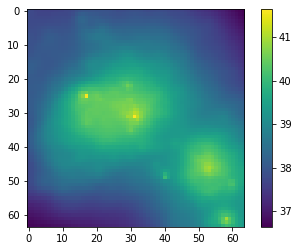

In [88]:
locs = np.argwhere(data.images == 0)
print(locs)
print(data.indices[6765])
print(np.sum(locs[:,0] == 6765))
print(len(locs))
print((data.soap_file["SO/500_crit/SORadius"][8386992]))
plt.imshow(np.log10(data.images[501,0]))
plt.colorbar()
plt.show()

In [3]:
#remove single image from data and save
dataset = np.load(p["data_path"] + p_to_filename(p) + "big2" + ".npy")
halo_indices = np.load(p["data_path"] + p_to_filename(p) + "big2" + "_halo_indices" + ".npy")
# dataset = np.delete(dataset, 501, axis=0)
# halo_indices = np.delete(halo_indices, 501)
print(dataset.shape)
print(halo_indices.shape)
# np.save(p["data_path"] + p_to_filename(p) + "big2", dataset)
# np.save(p["data_path"] + p_to_filename(p) + "big2_halo_indices", halo_indices)

(7939, 2, 64, 64)
(7939,)


In [5]:
# np.save(p["data_path"] + p_to_filename(p) + "small", dataset[:64, :, :, :])
# np.save(p["data_path"] + p_to_filename(p) + "small_halo_indices", halo_indices[:64])

In [10]:
# print(data.soap_file[f"{p['selection_type']}/TotalMass"][()][halo_indices[:64]])
np.save(p["data_path"] + p_to_filename(p) + "small_masses", data.soap_file[f"{p['selection_type']}/TotalMass"][()][halo_indices[:64]])
# plt.hist(np.log10(data.soap_file[f"{p['selection_type']}/TotalMass"][()][halo_indices[:64]]))

In [49]:
# Append new data to half-finished data generation
dataset = np.load(p["data_path"] + p_to_filename(p) + "big2" + ".npy")
halo_indices = np.load(p["data_path"] + p_to_filename(p) + "big2" + "_halo_indices" + ".npy")
time_start = time.time()
for sample, halo_index in enumerate(halo_indices):
    if sample < len(data.images):
        continue
    red_flux, blue_flux = data.make_obs(halo_index)
    fluxes = np.append(red_flux, blue_flux).reshape(1, 2, p['resolution'], p['resolution'])
    dataset = np.append(dataset, fluxes).reshape(sample+1, 2, p['resolution'], p['resolution'])
    print(f"Sample {sample} of {len(halo_indices)} done. Time running: {time.time() - time_start}s")

    if sample%100 == 99:
        np.save(p["data_path"] + p_to_filename(p) + "big2_append4", dataset)
np.save(p["data_path"] + p_to_filename(p) + "big2_append4", dataset)

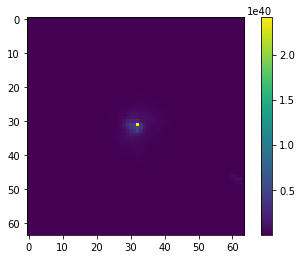

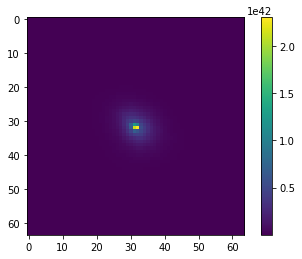

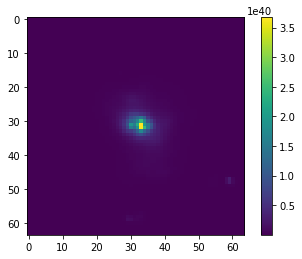

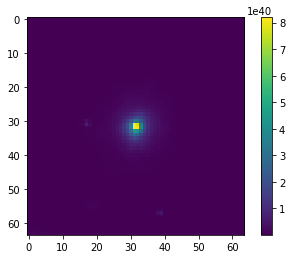

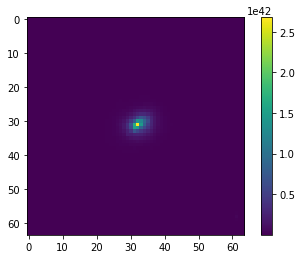

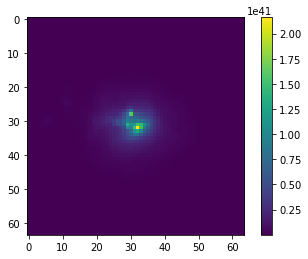

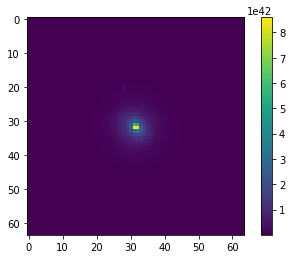

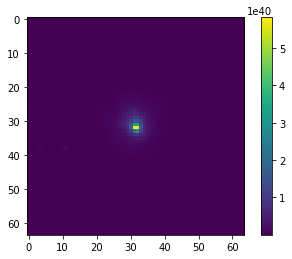

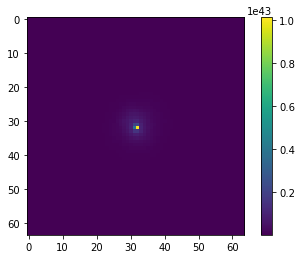

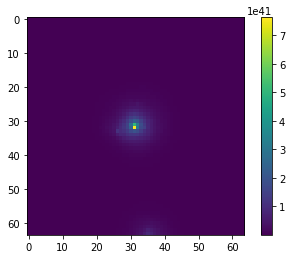

In [5]:
for image in data.images[:10]:
    plt.imshow((image[0]))
    plt.colorbar()
    plt.show()

(7941, 2, 64, 64)


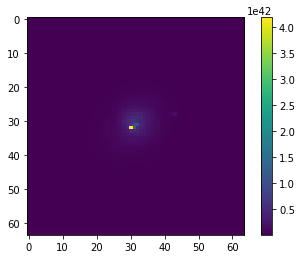

In [69]:
print(data.images.shape)
import matplotlib.pyplot as plt
plt.imshow(data.images[-4, 0])
plt.colorbar()
plt.show()

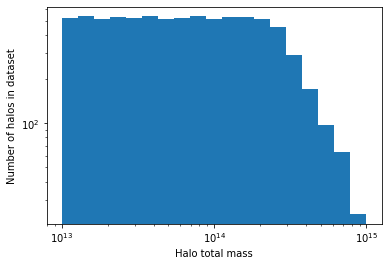

In [20]:
logbins = np.logspace(np.log10(np.min(data.masses)), np.log10(np.max(data.masses)), 20)
plt.hist(data.masses, bins=logbins)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of halos in dataset")
plt.xlabel("Halo total mass")
plt.show()

# make single obs data

In [23]:
soapfile = h5py.File("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0077.hdf5", "r")
mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5")

In [42]:
print(soapfile["VR/StructureType"][12902130])

10


In [57]:
halo_data = data.make_obs(5772976)

(421128,)
[0.57666016 0.57666016 0.57666016 ... 0.8222656  0.8222656  0.8222656 ] dimensionless (Comoving)


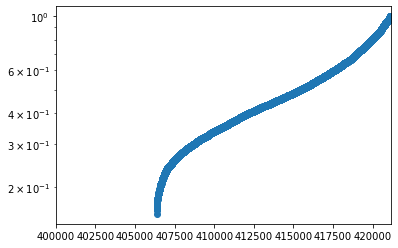

In [85]:
print((halo_data.gas.masses).shape)
print(np.sort(halo_data.gas.last_agnfeedback_scale_factors)[-4000:-1000])
plt.scatter(range(len(halo_data.gas.masses)), np.sort(halo_data.gas.last_agnfeedback_scale_factors))
# plt.xscale("log")
plt.xlim(400000, 421128)
plt.yscale("log")

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'black_holes', 'create_particle_datasets', 'dark_matter', 'filename', 'gas', 'get_metadata', 'get_units', 'mask', 'metadata', 'neutrinos', 'stars', 'units']


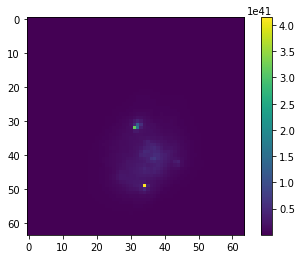

In [56]:
for i in range(5772976, 5772976+1):
    red_flux, blue_flux = data.make_obs(i)
    plt.imshow(red_flux)
    plt.colorbar()
    plt.show()

In [24]:
# def make_obs(halo_index=0):
#     print(soapfile["SO/500_crit/XRayLuminosity"][halo_index])
#     position = soapfile["SO/500_crit/CentreOfMass"][halo_index] * unyt.Mpc
#     # radius = soapfile["SO/500_crit/SORadius"][halo_index] * unyt.Mpc
#     radius = 2*unyt.Mpc
#     load_box = [[position[0] - radius, position[0] + radius], 
#                 [position[1] - radius, position[1] + radius], 
#                 [position[2] - radius, position[2] + radius]]
#     mask.constrain_spatial(load_box)
#     halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)

#     halo_mask = halo_data.gas.last_agnfeedback_scale_factors < 0.999
    

#     halo_data.gas.flux = halo_data.gas.xray_luminosities.erosita_low
#     flux = sw.visualisation.projection.project_gas(
#         halo_data,
#         resolution=64, 
#         project="flux", 
#         region=[position[0] - radius, position[0] + radius, position[1] - radius, position[1] + radius],
#         parallel = True,
#         mask = halo_mask
#     )
#     flux = np.float64(flux)
#     flux.convert_to_units(unyt.erg/unyt.s / unyt.kpc**2)

#     return flux

[8.67039471e+41 5.27437669e+40 6.16591649e+41]
7.736604162846131e+43 erg/(kpc**2*s) (Comoving)


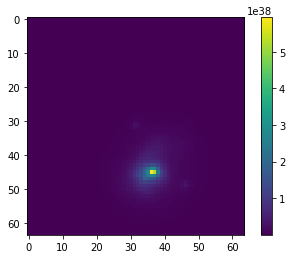

# test compton-y

In [3]:
data = Data(p)

In [5]:
mask = sw.mask(data.sw_path)
position = data.soap_file[f"{p['selection_type']}/CentreOfMass"][0] * unyt.Mpc
radius = p['obs_radius'] * unyt.Mpc
load_box = [[position[0] - radius, position[0] + radius], 
            [position[1] - radius, position[1] + radius], 
            [position[2] - radius, position[2] + radius]]
mask.constrain_spatial(load_box)

halo_data = sw.load(data.sw_path, mask=mask)

In [47]:
d = halo_data.metadata.cosmology
print(halo_data.metadata.cosmology)
print(d["Universe age [internal units]"]*1000 - 0.015)
print( (d["Omega_m"] / d["Omega_lambda"] * np.sinh(3.0/2.0 * np.sqrt(d["Omega_lambda"]) * d["H0 [internal units]"] * (d["Hubble time [internal units]"] - 0.000015))**2)**(1./3.))
# print(dir(halo_data.metadata.cosmology.values))
# print(dir(astropy))

{'Cosmological run': array([1], dtype=int32), 'Critical density [internal units]': array([12.87106552]), 'H [internal units]': array([68.09999997]), 'H0 [internal units]': array([68.09999997]), 'Hubble time [internal units]': array([0.01468429]), 'Lookback time [internal units]': array([9.02056208e-16]), 'M_nu_eV': array([0.06]), 'N_eff': array([3.04400163]), 'N_nu': array([1.]), 'N_ur': array([2.0308]), 'Omega_b': array([0.0486]), 'Omega_cdm': array([0.256011]), 'Omega_g': array([5.33243487e-05]), 'Omega_k': array([2.5212783e-09]), 'Omega_lambda': array([0.693922]), 'Omega_m': array([0.304611]), 'Omega_nu': array([0.00138908]), 'Omega_nu_0': array([0.00138908]), 'Omega_r': array([7.79180471e-05]), 'Omega_ur': array([2.45936984e-05]), 'Redshift': array([0.]), 'Scale-factor': array([1.]), 'T_CMB_0 [K]': array([2.7255]), 'T_CMB_0 [internal units]': array([2.7255]), 'T_nu_0 [eV]': array([0.00016819]), 'T_nu_0 [internal units]': array([1.9517578]), 'Universe age [internal units]': array([0